In [1]:
#/***************************************************************************
# *   Copyright (C) 2022 -- 2023 by Marek Sawerwain                         *
# *                                  <M.Sawerwain@gmail.com>                *
# *                                  <M.Sawerwain@issi.uz.zgora.pl>         *
# *                                                                         *
# *                              by Joanna Wiśniewska                       *
# *                                  <Joanna.Wisniewska@wat.edu.pl>         *
# *                                                                         *
# *   Part of the Quantum Distance Classifier:                              *
# *         https://github.com/qMSUZ/QDCLIB                                 *
# *                                                                         *
# *   Licensed under the EUPL-1.2-or-later, see LICENSE file.               *
# *                                                                         *
# *   Licensed under the EUPL, Version 1.2 or - as soon they will be        *
# *   approved by the European Commission - subsequent versions of the      *
# *   EUPL (the "Licence");                                                 *
# *                                                                         *
# *   You may not use this work except in compliance with the Licence.      *
# *   You may obtain a copy of the Licence at:                              *
# *                                                                         *
# *   https://joinup.ec.europa.eu/software/page/eupl                        *
# *                                                                         *
# *   Unless required by applicable law or agreed to in writing,            *
# *   software distributed under the Licence is distributed on an           *
# *   "AS IS" basis, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND,          *
# *   either express or implied. See the Licence for the specific           *
# *   language governing permissions and limitations under the Licence.     *
# *                                                                         *
# ***************************************************************************/

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import qdclib as qdcl

In [3]:
seed_value = 5678
np.random.seed( seed_value )

In [4]:
print("\n\nBasic example of kmedoids clustering states of 20 single qubits")
print("states contains only real amplitudes")
print("seed value:", seed_value)



Basic example of kmedoids clustering states of 20 single qubits
states contains only real amplitudes
seed value: 5678


In [5]:
d = qdcl.create_spherical_probes(20, 2)

print("Norms of each point in d:")
print(" " * 4,np.linalg.norm(d, axis=1))

Norms of each point in d:
     [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Plot all states on unit circle


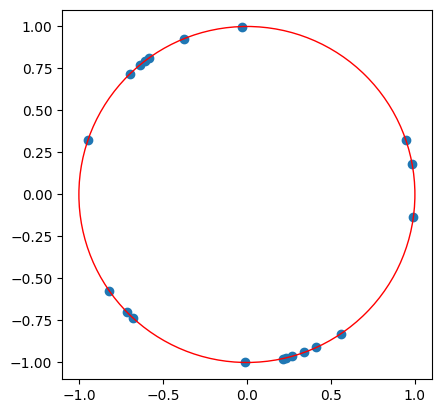

In [6]:
#
# Scatter plot of 2D data 
#

print("Plot all states on unit circle")

fig, ax = plt.subplots()
ax.set_aspect('equal')
circle = plt.Circle( (0,0), 1,  color='r', fill=False)
ax.scatter( d[:,0], d[:,1])
ax.add_patch(circle)

Norms of each point in centers:
     [1. 1. 1. 1.]
Plot all states on unit circle
with centers after clustering


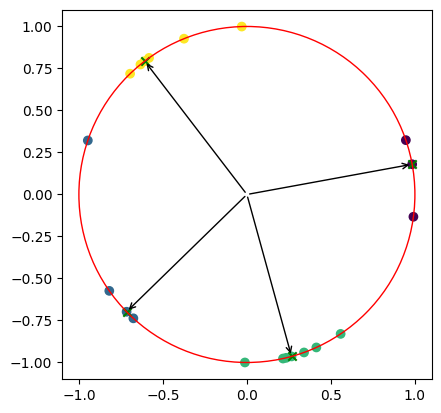

In [7]:
#
# four clusters
#

n_clusters = 4
labels, centers = qdcl.kmedoids_quantum_states( d, n_clusters, _func_distance=qdcl.COSINE_DISTANCE )

print("Norms of each point in centers:")
print(" " * 4,np.linalg.norm(centers, axis=1))

print("Plot all states on unit circle")
print("with centers after clustering")

fig, ax = plt.subplots()
ax.set_aspect('equal')
circle = plt.Circle( (0,0), 1,  color='r', fill=False)
ax.scatter( d[:,0], d[:,1], c=labels)
ax.scatter(centers[:, 0], centers[:, 1], marker='x', color='g')
for idx in range(n_clusters):
    ax.annotate("", xy=(centers[idx, 0], centers[idx, 1]), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
ax.add_patch(circle)

In [8]:
print("Distance between probes and centers for each classes")
t = qdcl.create_distance_table( d, centers, labels, n_clusters, qdcl.cosine_distance )
#t = qdcl.create_distance_table( d, centers, labels, n_clusters, qdcl.dot_product_as_distance )
print("")
print(t)

Distance between probes and centers for each classes

[[ 1.11022302e-16  0.00000000e+00]
 [ 4.88750369e-02  0.00000000e+00]
 [ 1.10019350e-02  0.00000000e+00]
 [ 5.46456540e-01  1.00000000e+00]
 [ 1.30229646e-02  1.00000000e+00]
 [ 1.58169473e-03  1.00000000e+00]
 [-2.22044605e-16  1.00000000e+00]
 [ 3.91994687e-02  2.00000000e+00]
 [ 1.37378143e-03  2.00000000e+00]
 [ 3.03762514e-03  2.00000000e+00]
 [ 1.23213294e-02  2.00000000e+00]
 [ 5.16665464e-02  2.00000000e+00]
 [ 5.51351616e-04  2.00000000e+00]
 [ 0.00000000e+00  2.00000000e+00]
 [ 5.17334284e-04  3.00000000e+00]
 [ 6.60032262e-03  3.00000000e+00]
 [ 0.00000000e+00  3.00000000e+00]
 [ 5.29817278e-04  3.00000000e+00]
 [ 3.62588866e-02  3.00000000e+00]
 [ 1.87919223e-01  3.00000000e+00]]
